Author: William Carlsson

How to run:
- Specify what trajectory file you want to run under step 1 by commenting out the file you don't want to run.
- Execute the notebook (Restart the kernal and run all cells)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

# Step 1 Read trajectory file

In [2]:
trajectory = np.loadtxt('traj-to-be-submitted.txt')
#trajectory = np.loadtxt('traj-to-test.txt')

print("Trajectory loaded. Number of data points:", len(trajectory))
print(np.min(trajectory))
print(np.max(trajectory))

Trajectory loaded. Number of data points: 10000
-1.14224
1.087738


The trajectory data (traj-to-be-submitted.txt) represents a 1D time series of continuous values sampled from a dynamical system.
- Each line corresponds to a system state at a specific timestep.
- Values range from about -1.14 to 1.08, showing movement between different states.
- I assume that the system states/values represent energy levels.

# Step 2 Discretize the trajectory into 50 clusters

In [3]:
n_bins = 50
bins = np.linspace(min(trajectory), max(trajectory), n_bins)
discrete_trajectory = np.digitize(trajectory, bins=bins)

print("Trajectory discretized into", n_bins, "bins.")

Trajectory discretized into 50 bins.


# Step 3 Plot the histogram of discretized trajectory and discrete trajectory over time

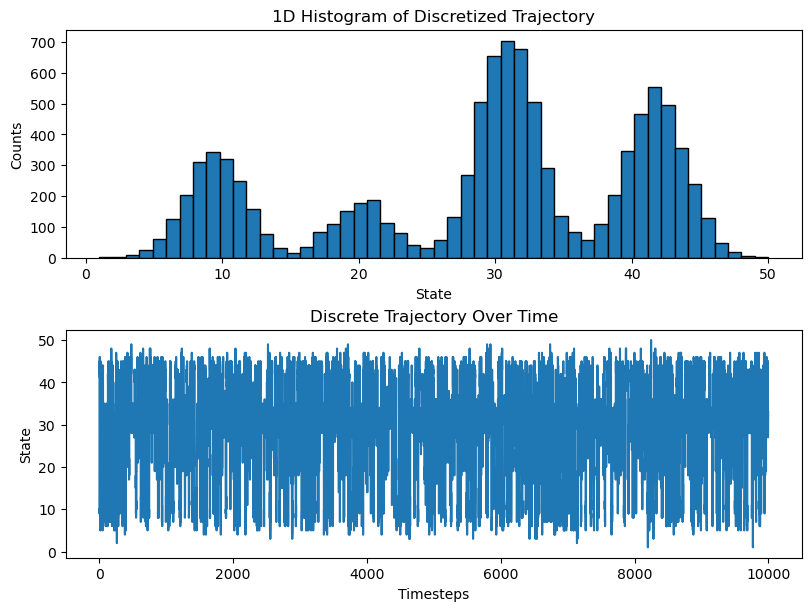

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), constrained_layout=True)

axs[0].hist(discrete_trajectory,bins=n_bins, edgecolor='black')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Counts')
axs[0].set_title('1D Histogram of Discretized Trajectory')

axs[1].plot(discrete_trajectory)
axs[1].set_xlabel('Timesteps')
axs[1].set_ylabel('State')
axs[1].set_title('Discrete Trajectory Over Time')

plt.show()

# Step 4 Count matrix

In [5]:
count_matrix = np.zeros((n_bins, n_bins))

for i in range(len(discrete_trajectory) - 1):
    current_state = discrete_trajectory[i]
    next_state = discrete_trajectory[i + 1]
    count_matrix[current_state - 1, next_state - 1] += 1

print("Count matrix calculated.")

Count matrix calculated.


# Step 5 Tranisiton matrix

In [6]:
transition_matrix = count_matrix / np.sum(count_matrix, axis=1, keepdims=True)
transition_matrix = np.nan_to_num(transition_matrix)

print("Transition matrix calculated.")

Transition matrix calculated.


# Step 6 Comments on dynamical system

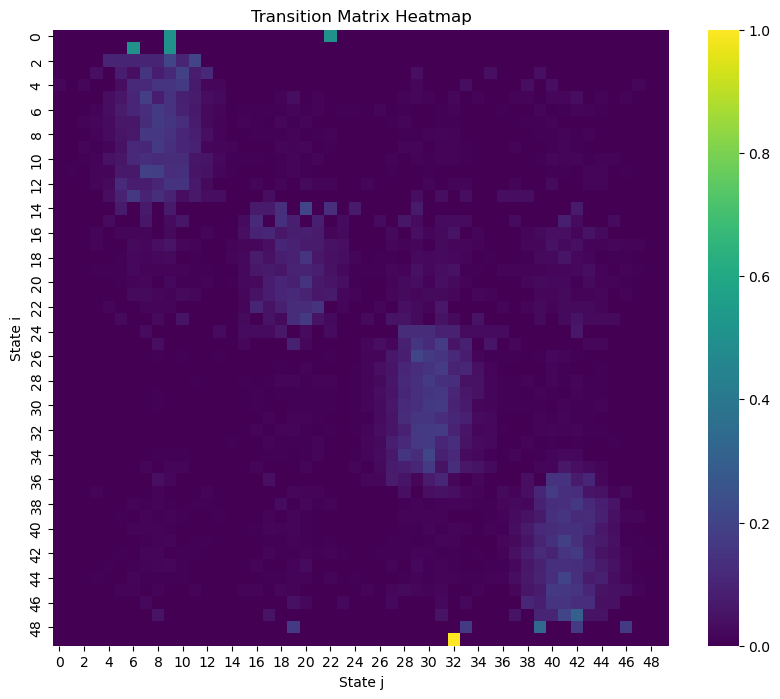

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, cmap='viridis', cbar=True, square=True)
plt.title('Transition Matrix Heatmap')
plt.xlabel('State j')
plt.ylabel('State i')
plt.show()

By looking at the heatmap of the transition matrix I expect the following:
- 4 macrostates (the diagonal blocks), also makes sense by looking at the histogram from step 3.
- 3 slow processes (transitions between the macrostates).

# Step 7 Eigenvalues

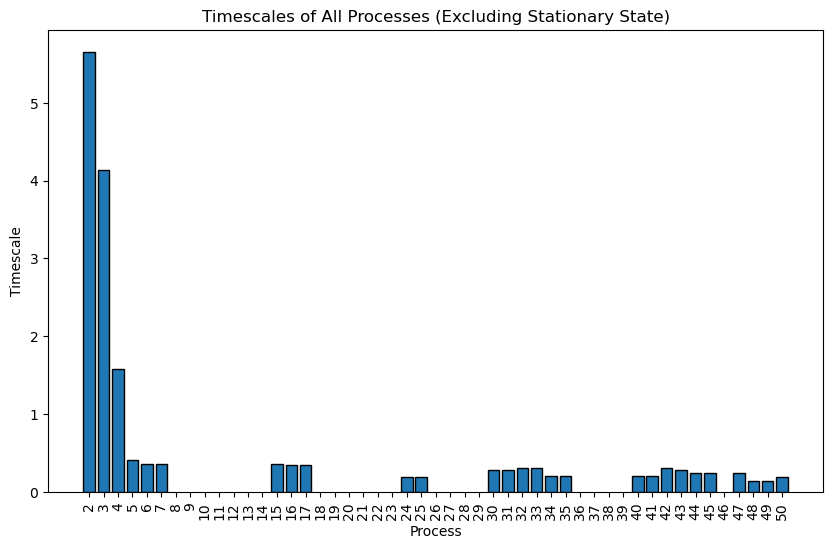

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)
lag_time = 1
timescales = -lag_time / np.log(np.real(eigenvalues[1:]))

process_indices = [f'{i+2}' for i in range(len(timescales))]
plt.figure(figsize=(10, 6))
plt.bar(process_indices, timescales,edgecolor='black')
plt.xlabel('Process')
plt.ylabel('Timescale')
plt.title('Timescales of All Processes (Excluding Stationary State)')
plt.xticks(rotation=90)
plt.show()

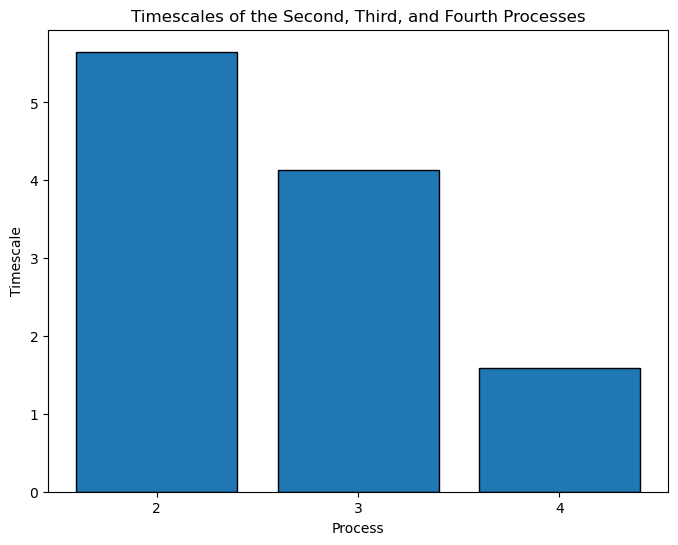

In [9]:
lag_time = 1
timescales = -lag_time / np.log(np.real(eigenvalues[1:4]))

process_indices = ['2', '3', '4'] 
plt.figure(figsize=(8, 6))
plt.bar(process_indices, timescales, edgecolor='black')

plt.xlabel('Process')
plt.ylabel('Timescale')
plt.title('Timescales of the Second, Third, and Fourth Processes')
plt.show()

The slowest process is process 2 (second eigenvalue) with about 6 time steps, followed by process 3 with about 4 time steps and lastly process 4 with about 2 time steps.

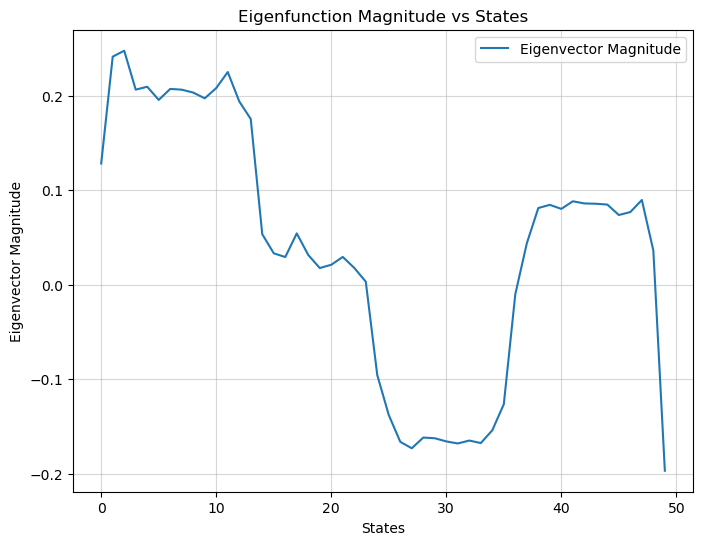

In [10]:
slowest_process_eigenvector = eigenvectors[:, 1]
eigenvector_magnitude = slowest_process_eigenvector
states = np.arange(len(eigenvector_magnitude)) 

plt.figure(figsize=(8, 6))
plt.plot(states, eigenvector_magnitude, label='Eigenvector Magnitude')
plt.xlabel('States')
plt.ylabel('Eigenvector Magnitude')
plt.title('Eigenfunction Magnitude vs States')
plt.grid(alpha=0.5)
plt.legend()
plt.show()